In [164]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from skbio.stats.composition import ilr,clr,alr
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
family = pd.DataFrame(pd.read_csv("./Family_Income_and_Expenditure.csv"))
family.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [166]:
expenditure = ['Total Food Expenditure', 'Medical Care Expenditure', 'Education Expenditure',
                      'Housing and water Expenditure', 'Communication Expenditure', 
                      'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 
                      'Clothing, Footwear and Other Wear Expenditure']
df = family[expenditure]
#df = df[(df != 0).all(axis=1)]
#df = df.div(df.sum(axis=1), axis=0)
df.head()

,Total Food Expenditure,Medical Care Expenditure,Education Expenditure,Housing and water Expenditure,Communication Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure"
0,117848,3457,36200,63636,2880,0,0,4607
1,67766,3520,29300,41370,5700,960,2132,8230
2,61609,70,425,14340,420,270,4525,2735
3,78189,60,300,16638,660,480,0,1390
4,94625,140,0,31122,2100,1040,0,4620


In [167]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
train_data, test_data = train_test_split(family, test_size=0.2, random_state=42)

# Xác định các biến độc lập và biến mục tiêu
X_train = train_data[['Total Food Expenditure', 'Medical Care Expenditure', 'Education Expenditure',
                      'Housing and water Expenditure', 'Communication Expenditure', 
                      'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 
                      'Clothing, Footwear and Other Wear Expenditure']]
print(np.min(X_train), np.max(X_train))
X_train = X_train.div(X_train.sum(axis=1), axis=0)
X_train = clr(X_train + 1e-10)
print(np.min(X_train), np.max(X_train))
X_train = pd.DataFrame(X_train)
y_train = test_data['Total Household Income']

X_test = test_data[['Total Food Expenditure', 'Medical Care Expenditure', 'Education Expenditure',
                      'Housing and water Expenditure', 'Communication Expenditure', 
                      'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 
                      'Clothing, Footwear and Other Wear Expenditure']]
X_test = X_test.div(X_test.sum(axis=1), axis=0)
X_test = clr(X_test + 1e-10)
X_test = pd.DataFrame(X_test)
y_test = test_data['Total Household Income']
print("Kích thước của mảng:", y_test.shape)
# Huấn luyện mô hình hồi quy tuyến tính với kiểm tra chéo
model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
model.fit(X_train, y_train)



0 2188560
-18.17986847278945 17.460490694622166
Kích thước của mảng: (8309,)


ValueError: Found input variables with inconsistent numbers of samples: [33235, 8309]

In [ ]:
# In mô hình ra console
print("CV RMSE scores:", np.sqrt(-cv_scores))
print("Mean CV RMSE:", np.sqrt(-cv_scores).mean())

CV RMSE scores: [269540.85878032 235693.19074524 229492.2843607  287119.7468995
 315315.42158487 224022.60367107 209951.63843816 243532.30268069
 251665.25364511 330258.05212487]
Mean CV RMSE: 259659.1352930522


In [ ]:
# Tính tầm quan trọng của các biến
importance = model.coef_
var_importance = pd.DataFrame({'Variables': X_train.columns, 'Importance': importance})
var_importance = var_importance.sort_values(by='Importance', ascending=False)

In [ ]:
# Hàm để vẽ tầm quan trọng của các biến
def plot_importance(var_importance):
    var_importance['Rank'] = var_importance['Importance'].rank(ascending=False)
    plt.figure(figsize=(10, 8))  # Kích thước hợp lý cho hình ảnh
    sns.barplot(x='Importance', y='Variables', data=var_importance, palette='coolwarm')
    for index, row in var_importance.iterrows():
        plt.text(row['Importance'], index, f"#{int(row['Rank'])}", color='black', ha="left", va="center")
    plt.title('Relative Variable Importance')
    plt.show()

plot_importance(var_importance)

/tmp/ipykernel_9649/1270015597.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Variables', data=var_importance, palette='coolwarm')


ValueError: Image size of -268705792x701 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x800 with 1 Axes>

In [ ]:
# Dự đoán cho tập kiểm tra
pred = model.predict(X_test)
print("Kích thước của mảng:", pred.shape)
# In ra console các giá trị dự đoán
print(pred)

Kích thước của mảng: (8309, 8)
[443538.24359862 443282.24359862 462482.24359862 ...   6546.24359862
 186618.24359862  -6765.75640138]


In [ ]:
# Tính toán lỗi
error = pred - y_test

# Tính RMSE
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE:", rmse)

ValueError: operands could not be broadcast together with shapes (8309,) (33235,) 

Kích thước của mảng: (8309,)
Kích thước của mảng: (8309,)


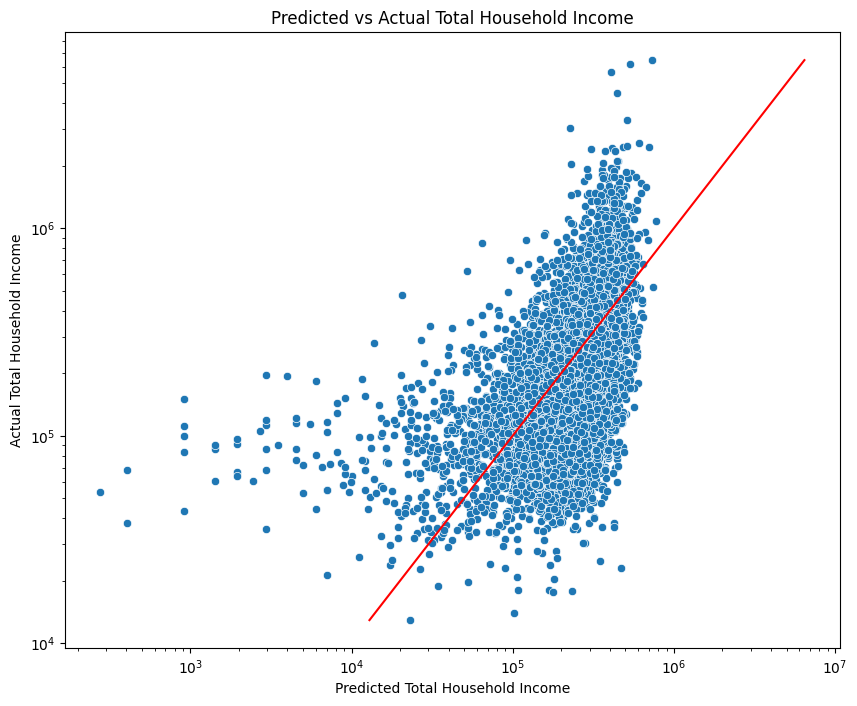

In [168]:
print("Kích thước của mảng:", pred.shape)
print("Kích thước của mảng:", y_test.shape)

# Plot the predictions (on the x-axis) against the outcome (cty) on the test data
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pred, y=y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Predicted Total Household Income')
plt.ylabel('Actual Total Household Income')
plt.title('Predicted vs Actual Total Household Income')
plt.show()